# CA02 - Training Perceptron and Adaline models

Make sure you: 
> a) describe briefly what you intend to do using markdown cells;\
> b) comment your code properly but briefly, such that the reader can easily understand what the code is doing.


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the relevant classes from adaline.py and perceptron.py in the classifiers folder
#========================================================================================
from classifiers.adaline import AdalineGD
from classifiers.perceptron import Perceptron

## Loading and exploring data


Visualise the raw data with appropriate plots and inspect it for possible outliers or inconsistencies. Comment briefly on what you see and how this will impact the performance of the perceptron and adaline. For this use no more than three sentences.

In [2]:
# Insert your code below
# ======================
# Set the directory
%cd ../assets
path = %pwd

# Load the data
raw_df = pd.read_csv(path + "\\diabetes_data.csv", index_col = 0)
raw_df.head(5)

C:\Users\catha\Desktop\Jisoo\NMBU_DataScience\2022_Spring\DAT200\v2022\compulsory assignments\CA2\assets


,children,Plasma concentration,Blood pressure,Triceps skin,2-Hour serum,BMI,Diabetes pedigree,Age,class
0,6,152.386300,65,35,0,33.6,0.627,47,1
1,1,91.432246,77,29,0,26.6,0.351,28,0
2,8,189.380323,72,0,0,23.3,0.672,30,1
3,1,101.985200,58,23,94,28.1,0.167,22,0
4,0,111.076241,47,35,168,43.1,2.288,32,1


In [3]:
raw_df.info() # brief info of the raw data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   children              768 non-null    int64  
 1   Plasma concentration  768 non-null    float64
 2   Blood pressure        768 non-null    int64  
 3   Triceps skin          768 non-null    int64  
 4   2-Hour serum          768 non-null    int64  
 5   BMI                   768 non-null    float64
 6   Diabetes pedigree     768 non-null    float64
 7   Age                   768 non-null    int64  
 8   class                 768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 60.0 KB


In [4]:
# count of Y variable
print(raw_df['class'].value_counts() )
print("ratio of y: \n", raw_df['class'].value_counts()/len(raw_df))

0    500
1    268
Name: class, dtype: int64
ratio of y: 
 0    0.651042
1    0.348958
Name: class, dtype: float64


In [5]:
# Describe of X variables
raw_df.iloc[:, :-1].describe()

,children,Plasma concentration,Blood pressure,Triceps skin,2-Hour serum,BMI,Diabetes pedigree,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.213192,69.158854,20.536458,79.799479,31.992578,0.471876,32.671875
std,3.369578,34.360448,21.509666,15.952218,115.244002,7.884160,0.331329,11.975274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,18.000000
25%,1.000000,95.624826,59.750000,0.000000,0.000000,27.300000,0.243750,23.000000
50%,3.000000,115.902925,71.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,141.105950,82.000000,32.000000,127.250000,36.600000,0.626250,39.000000
max,17.000000,227.123407,131.000000,99.000000,846.000000,67.100000,2.420000,87.000000


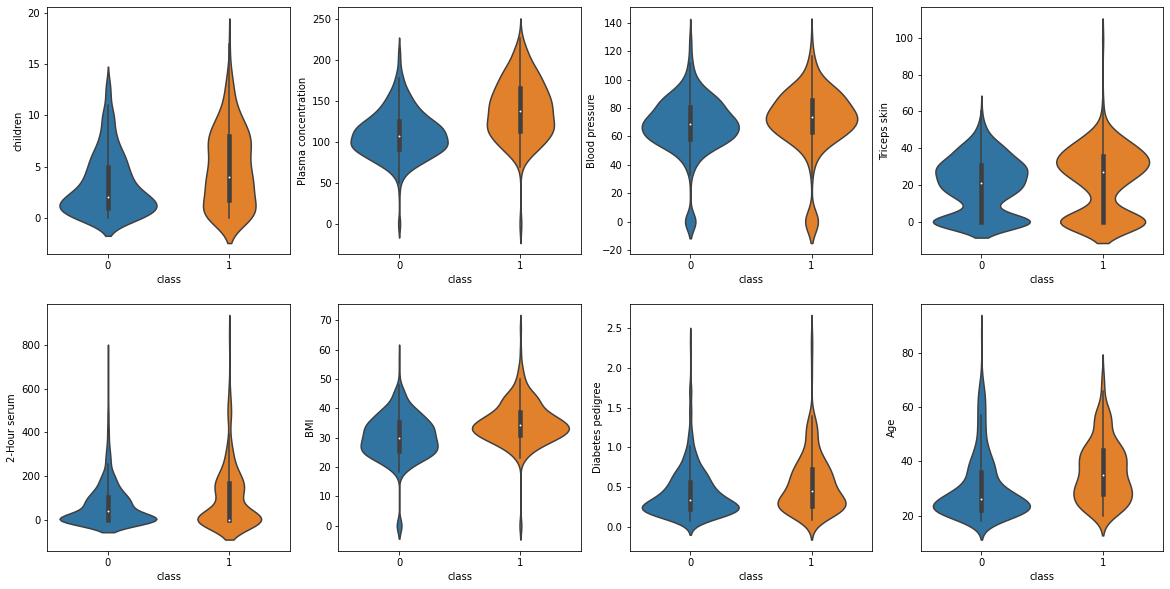

In [6]:
# Describe of X variables
# raw_df.iloc[:, :-1].describe()
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))
for i, col_name in enumerate(raw_df):
    row = i // 4
    col = i % 4
    if row in range(0, 2):
        sns.violinplot(data = raw_df, x = 'class', y = col_name, ax = axes[row][col])
plt.show()

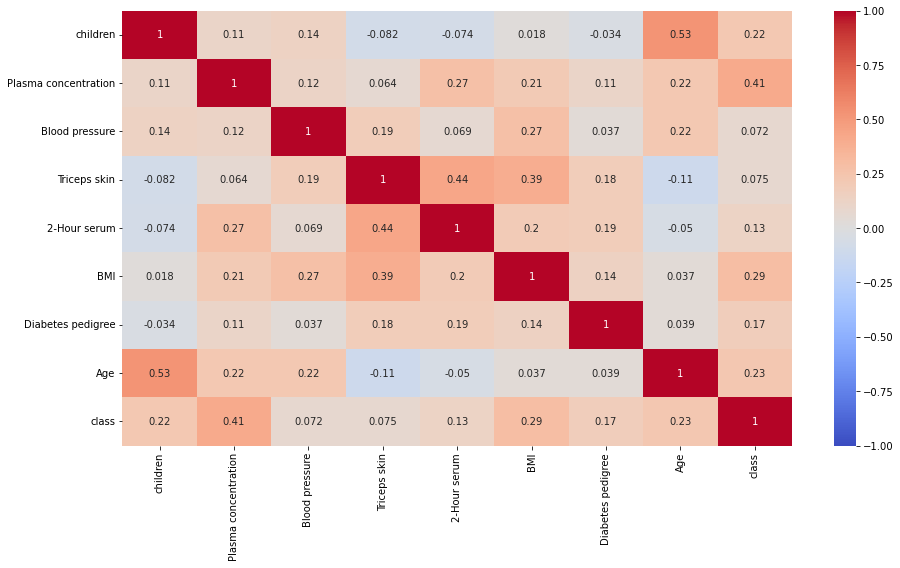

In [7]:
## correlation between the X variables
# raw_df_corr = raw_df.corr()
# raw_df_corr.style.background_gradient()
plt.figure(figsize = (15, 8))
sns.heatmap(raw_df.corr(), annot = True, vmax = 1, vmin = -1, cmap = 'coolwarm')
plt.show()

#### After delete the outliers

In [8]:
# cols = raw_df.columns
# print(raw_df.shape)
# for col in cols: 
#     mean = raw_df[col].mean() 
#     std = raw_df[col].std() 
#     threshold = mean + 3 * std 
#     n_outlier = np.sum(raw_df[col] > threshold) 
#     print(col, " - # of outliers :",  n_outlier)
df = raw_df[(raw_df['Blood pressure'] > 0) & (raw_df['BMI'] > 0)]
print("Deleted rows : ", len(raw_df) - len(df))

Deleted rows :  39


In [9]:
df.describe()

,children,Plasma concentration,Blood pressure,Triceps skin,2-Hour serum,BMI,Diabetes pedigree,Age,class
count,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000,729.000000
mean,3.858711,120.490005,72.423868,21.499314,83.946502,32.469959,0.474117,32.740741,0.344307
std,3.357468,34.596042,15.678081,15.708376,116.803000,6.885098,0.331649,11.958146,0.475468
min,0.000000,0.000000,21.000000,0.000000,0.000000,18.200000,0.078000,18.000000,0.000000
25%,1.000000,95.634087,61.000000,0.000000,0.000000,27.500000,0.245000,23.000000,0.000000
50%,3.000000,115.956395,71.000000,24.000000,46.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,141.595364,83.000000,33.000000,130.000000,36.600000,0.627000,39.000000,1.000000
max,17.000000,227.123407,131.000000,99.000000,846.000000,67.100000,2.420000,87.000000,1.000000


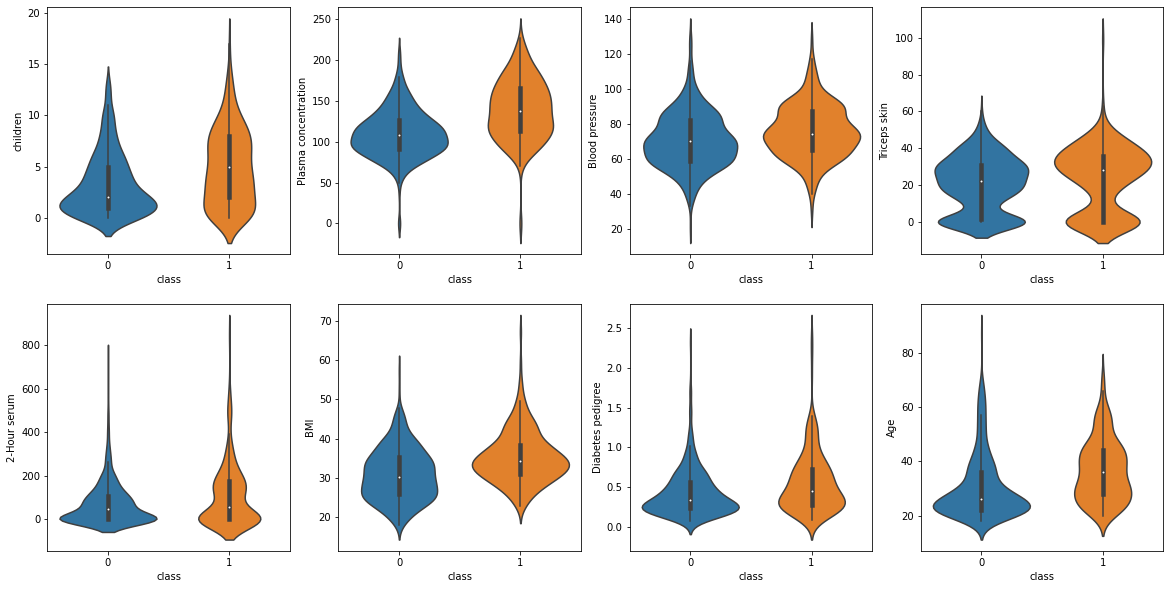

In [10]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))
for i, col_name in enumerate(df):
    row = i // 4
    col = i % 4
    if row in range(0, 2):
        sns.violinplot(data = df, x = 'class', y = col_name, ax = axes[row][col])
plt.show()

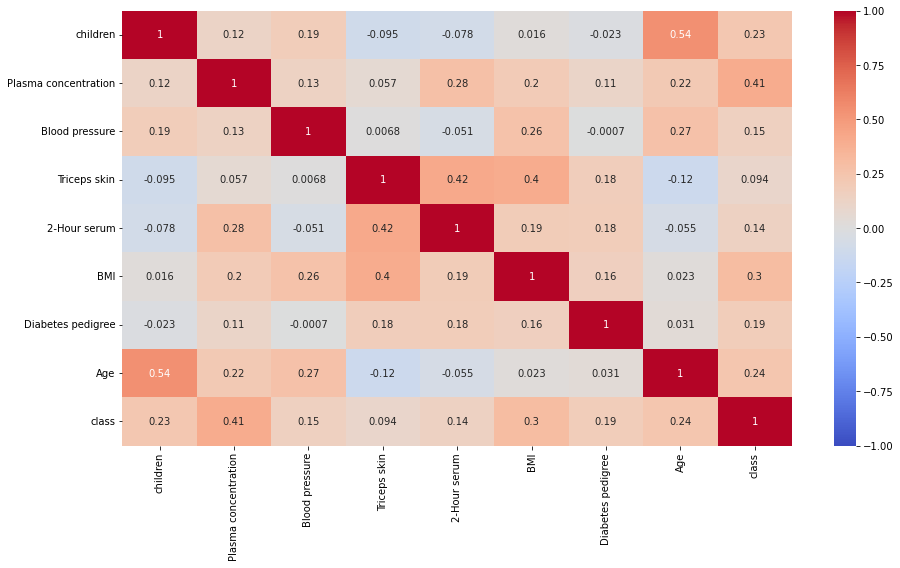

In [11]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, vmax = 1, vmin = -1, cmap = 'coolwarm')
plt.show()

##### Brief Comment:
* Some columns such as `Blood Pressure`, `BMI` should not be equal to zero since the sample is measured from a live human being. Thus, it could be considered an outlier and deleted or imputed with another measurement.
* When we Compare its correlation with and without outliers, we can see the slightly differences between them.

## Preprocessing data and training models

- Split the data into training and test_sets, where 400 samples are used for training, the remaing rows should be used for testing.
- Make sure the target values are appropriate for the Adaline and Perceptron classifiers
- Make sure that no data leakage occurs when scaling the data

With each of the 400 models, you should predict the classes of the unseen samples in the test data and compute the test set classification accuracy. Store the results in a (8 x 50) numpy array or a pandas dataframe.

__Preprocessing:__

In [12]:
# Insert your code below
# ======================
np.random.seed(147)
X_train = raw_df.iloc[:400, :-1]
y_train = raw_df.iloc[:400, -1]
y_train = np.where(y_train == 1, 1, -1)

X_test = raw_df.iloc[400:, :-1]
y_test = raw_df.iloc[400:, -1]
y_test = np.where(y_test == 1, 1, -1)

print("Train data: ")
print(f'Shape of X train: {X_train.shape}')
print(f'Shape of y train: {y_train.shape}')
print("==============================")
print("Test data: ")
print(f'Shape of X test: {X_test.shape}')
print(f'Shape of y test: {y_test.shape}')

# Standardization
X_train_std = np.copy(X_train)
X_train_std = (X_train - X_train.mean()) / X_train.std()

X_test_std = np.copy(X_test)
X_test_std = (X_test - X_test.mean()) / X_test.std()


Train data: 
Shape of X train: (400, 8)
Shape of y train: (400,)
Test data: 
Shape of X test: (368, 8)
Shape of y test: (368,)


__Training:__

In [13]:
# Insert your code below
# ======================

lst1 = [] # for Perceptron
lst2 = [] # for Adaline
for i in range(1, 9):
    # Subset the data
    X = X_train_std[:50*i].to_numpy()
    y = y_train[:50*i]
    
    for j in range(1, 51):
        # fit Perceptron
        ppn = Perceptron(eta = 0.0001, n_iter = j).fit(X, y)
        # predict the class -1 or 1
        y_pred_ppn = ppn.predict(X_test_std)
        # print("# of data", i * 50, "Epochs: ", j," # of correct classification = ", (y_pred == y_test).sum())
        # number of correct classification
        num_correct_ppn = (y_pred_ppn == y_test).sum()
        # calculate the accuracy 
        accuracy_ppn = num_correct_ppn / X_test_std.shape[0]
        # Append results 
        lst1.append([50*i, j, num_correct_ppn, accuracy_ppn])

        # fit Adaline
        ada = AdalineGD(eta = 0.0001, n_iter = j).fit(X, y)
        # predict the class -1 or 1
        y_pred_ada = ada.predict(X_test_std)
        # number of correct classification
        num_correct_ada = (y_pred_ada == y_test).sum()
        # calculate the accuracy 
        accuracy_ada = num_correct_ada / X_test_std.shape[0]
        # Append results 
        lst2.append([50*i, j, num_correct_ada, accuracy_ada])
        
# Assign to dataframe        
ppn_res = pd.DataFrame(lst1, columns =['num_rows', 'epochs', 'num_correct', 'accuracy'])
ada_res = pd.DataFrame(lst2, columns =['num_rows', 'epochs', 'num_correct', 'accuracy'])

In [14]:
ppn_res

,num_rows,epochs,num_correct,accuracy
0,50,1,136,0.369565
1,50,2,151,0.410326
2,50,3,164,0.445652
3,50,4,176,0.478261
4,50,5,185,0.502717
...,...,...,...,...
395,400,46,267,0.725543
396,400,47,254,0.690217
397,400,48,255,0.692935
398,400,49,253,0.687500


In [15]:
ada_res

,num_rows,epochs,num_correct,accuracy
0,50,1,134,0.364130
1,50,2,147,0.399457
2,50,3,165,0.448370
3,50,4,176,0.478261
4,50,5,190,0.516304
...,...,...,...,...
395,400,46,285,0.774457
396,400,47,286,0.777174
397,400,48,285,0.774457
398,400,49,285,0.774457


## Visualizing results

Plot a heatmap of the results (test set classification accuracy) using Python plotting packages matplotlib or seaborn . See canvas for images of what the heatmaps should look like for the two classification algorithms.

In [16]:
ppn_res.pivot_table(index = 'num_rows', columns = 'epochs', values = 'accuracy')

epochs,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
num_rows,,,,,,,,,,,,,,,,,,,,,
50,0.369565,0.410326,0.445652,0.478261,0.502717,0.529891,0.570652,0.584239,0.586957,0.592391,...,0.644022,0.633152,0.630435,0.641304,0.625000,0.654891,0.614130,0.603261,0.611413,0.652174
100,0.464674,0.554348,0.592391,0.641304,0.676630,0.703804,0.709239,0.703804,0.706522,0.698370,...,0.736413,0.698370,0.665761,0.717391,0.559783,0.684783,0.671196,0.703804,0.698370,0.682065
150,0.538043,0.622283,0.665761,0.711957,0.730978,0.714674,0.744565,0.755435,0.739130,0.733696,...,0.703804,0.747283,0.747283,0.703804,0.733696,0.725543,0.695652,0.739130,0.703804,0.733696
200,0.559783,0.665761,0.720109,0.744565,0.701087,0.630435,0.706522,0.673913,0.592391,0.663043,...,0.633152,0.665761,0.644022,0.589674,0.663043,0.630435,0.682065,0.644022,0.673913,0.646739
250,0.595109,0.701087,0.741848,0.676630,0.646739,0.671196,0.649457,0.619565,0.652174,0.573370,...,0.625000,0.660326,0.676630,0.625000,0.584239,0.614130,0.603261,0.616848,0.652174,0.614130
300,0.611413,0.722826,0.690217,0.619565,0.510870,0.546196,0.578804,0.638587,0.502717,0.562500,...,0.510870,0.527174,0.573370,0.595109,0.521739,0.489130,0.521739,0.562500,0.546196,0.508152
350,0.652174,0.709239,0.535326,0.470109,0.605978,0.559783,0.584239,0.619565,0.625000,0.592391,...,0.532609,0.557065,0.633152,0.614130,0.600543,0.595109,0.595109,0.627717,0.554348,0.532609
400,0.673913,0.733696,0.717391,0.627717,0.652174,0.622283,0.679348,0.646739,0.690217,0.646739,...,0.619565,0.709239,0.750000,0.660326,0.679348,0.725543,0.690217,0.692935,0.687500,0.671196


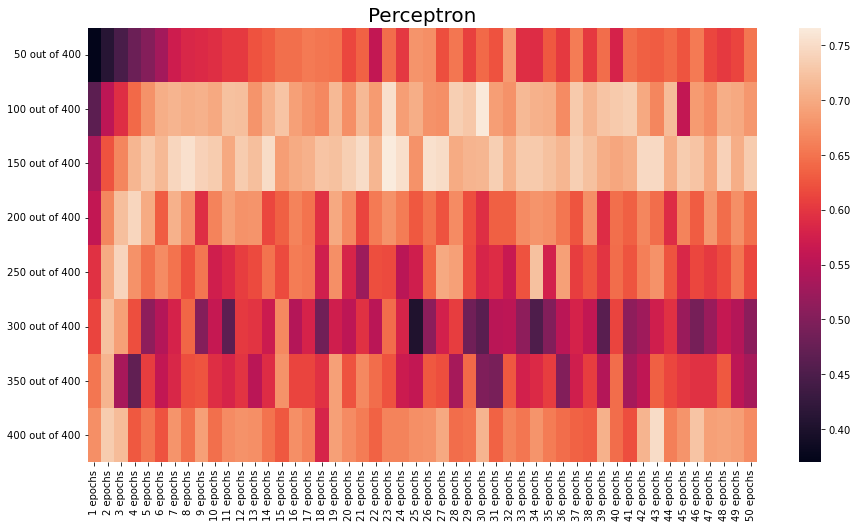

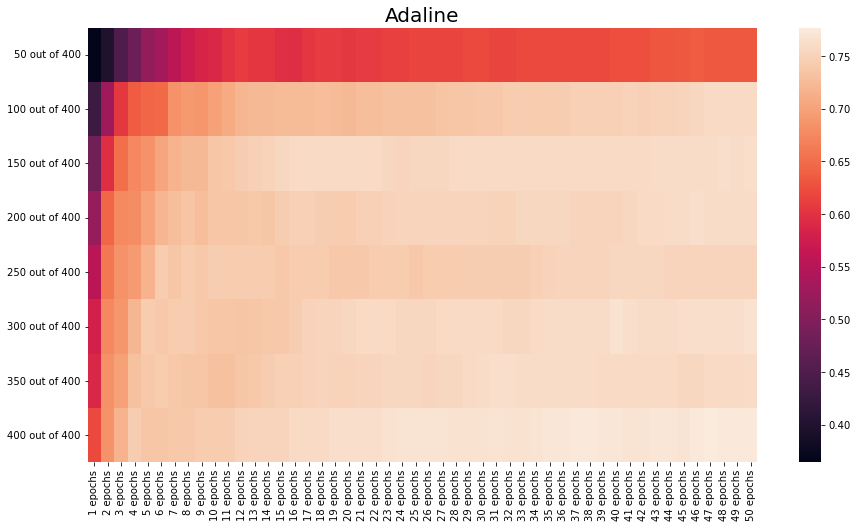

In [17]:
# Insert your code below
# ======================
xticks = [f'{i} epochs' for i in range(1, 51)]
yticks = [f'{i} out of 400' for i in range(50, 401, 50)]

# Perceptron 
plt.figure(figsize = (15, 8))
sns.heatmap(ppn_res.pivot_table(index = 'num_rows', columns = 'epochs', values = 'accuracy'),
            xticklabels = xticks,
            yticklabels = yticks)
plt.title("Perceptron", fontsize = 20)
plt.xlabel("")
plt.ylabel("")

# Adaline
plt.figure(figsize = (15, 8))
sns.heatmap(ada_res.pivot_table(index = 'num_rows', columns = 'epochs', values = 'accuracy'),
            xticklabels = xticks,
            yticklabels = yticks)
plt.title("Adaline", fontsize = 20)
plt.xlabel("")
plt.ylabel("")

plt.show()

## Metrics

Provide the maximum test set classification accuracy for each, the perceptron classifier and the adaline classifier and information on with which combination of number training data samples and number of epochs the best classification accuracy was achieved. 

In [18]:
# Insert your code below
# ======================

print("Perceptron maximum : ")
print(ppn_res.loc[ppn_res['accuracy'].idxmax()])
print("========================================")
print("Adaline maximum : ")
print(ada_res.loc[ada_res['accuracy'].idxmax()])

Perceptron maximum : 
num_rows       150.000000
epochs          23.000000
num_correct    282.000000
accuracy         0.766304
Name: 122, dtype: float64
Adaline maximum : 
num_rows       400.000000
epochs          47.000000
num_correct    286.000000
accuracy         0.777174
Name: 396, dtype: float64


## Discussion

1. The training time of the simpler perceptron algorithm is quite a bit longer than the training time of the adaline algorithm. What might be the reason for this?
2. The heatmap of the classification accuracy for the adaline algorithm is smoother than the perceptron heatmap. What might be the reason for this?

__Insert your answer below__

=====================

1. Perceptron algorithm updates its weights immediately after misclassification, which means this can happen multiple times of updating through epochs and iterations. On the other hand, the Adaline algorithm updates its weight only at the end of each iteration. Thus, this might be the reason for the difference in training time.

2. The activation function in the Simple Perceptron algorithm is simply compared between predictions and actual and is updated weights based on its comparison. The activation function in the Adaline algorithm is updated weights using the Sum of Squared Error(SSE). Furthermore, it attempts to find minimized weight with gradient descent. Hence, using gradient descent might be the reason for having a smooth Adaline heatmap.

---